# Imports

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [106]:
dataset = pd.read_csv("/content/drive/MyDrive/AI_Human.csv")

In [5]:
dataset.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# Feature Engineering

Since the raw dataset is too big in size (~1 GB), our goal is to remove some rows from it which are making the dataset inaccurate or biased towards certain patterns. Thereby, acheiving two things at once:

1. Reduction in the size of the dataset to roughly 5000 rows.
2. Dataset accuracy improvement.

In [155]:
refined_dataset = dataset.copy()

In [154]:
def compare_original_and_refined(original: pd.DataFrame, refined: pd.DataFrame) -> None:
  """
  Compare original and refined datasets.
  """
  print(f"Original dataset size: {len(original)}")
  print(f"Refined dataset size: {len(refined)}")
  print(f"Number of rows removed: {len(original) - len(refined)}")

## Removing rows with empty values

In [156]:
refined_dataset.dropna(inplace=True)

## Removing duplicate rows

In [157]:
refined_dataset.drop_duplicates(inplace=True)

## Removing rows that are either too big or too small

In [158]:
def remove_invalid_rows(dataset: pd.DataFrame, min_length=500, max_length=5000) -> None:
  """Removes rows from the dataset whose text is either too big or too small"""
  number_of_rows_removed = 0
  rows_to_remove = []

  for index, row in dataset.iterrows():
    if not min_length < len(row['text']) < max_length:
      rows_to_remove.append(index)
      number_of_rows_removed += 1

  dataset.drop(rows_to_remove, inplace=True)
  print(f"Number of rows removed: {number_of_rows_removed}")


In [159]:
# REMOVING ROWS WITH SMALL OR MASSIVE TEXT
remove_invalid_rows(refined_dataset)

Number of rows removed: 10624


## Checking length of X-values

We will be building our model to work only one paragraphs because one sentence on its own is too small and doesn't provide enough data to predict whether its human or ai generated.

In [160]:
def plot_text_length(dataset: pd.DataFrame) -> None:
  """
  Plots length of text on X-axis and number of occurences on y-axis.
  """
  word_counts = {}

  for text in dataset['text']:
    if len(text) not in word_counts:
      word_counts[len(text)] = 0
    word_counts[len(text)] += 1

  plt.bar(word_counts.keys(), word_counts.values())
  plt.title("Length of X-values V/S Number of occurences")
  plt.show()

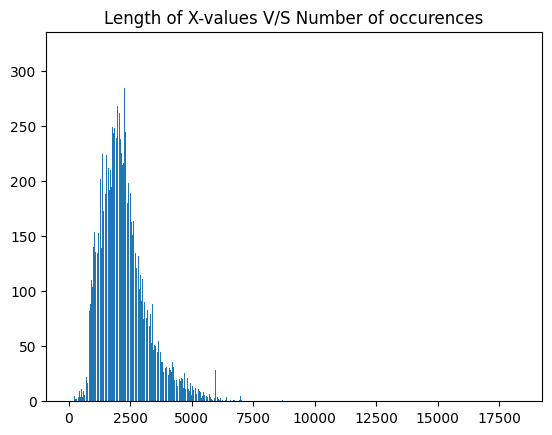

In [161]:
plot_text_length(dataset)

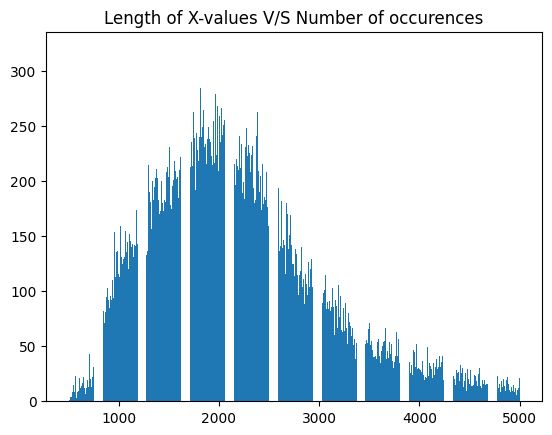

In [162]:
plot_text_length(refined_dataset)

In [116]:
compare_original_and_refined(dataset, refined_dataset)

Original dataset size: 487235
Refined dataset size: 477489
Number of rows removed: 9746


## How many AI and Real examples are there?

It is important to not have too many rows of one type as this can lead to the model being biased during training.

In [164]:
def real_vs_ai_count_comparison(dataset: pd.DataFrame) -> None:
  """
  Plots a bar-graph to show how many real vs ai examples are there in the
  given dataframe.
  """
  real_or_ai_values = dataset['generated'].value_counts()
  plt.bar(real_or_ai_values.index, real_or_ai_values.values)
  plt.show()

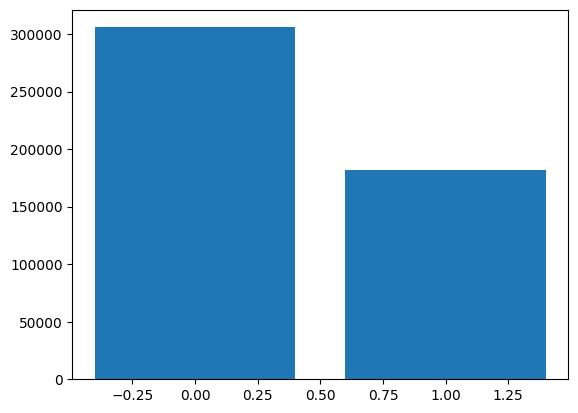

In [165]:
real_vs_ai_count_comparison(dataset)

There seem to be a lot more 'real' values than 'ai'. This could lead to biasing during training. Let's fix that.

### Dropping some 'real' examples

In [166]:
rows_to_drop = refined_dataset[refined_dataset['generated'] == 0][:120000].index
refined_dataset.drop(rows_to_drop, inplace=True)

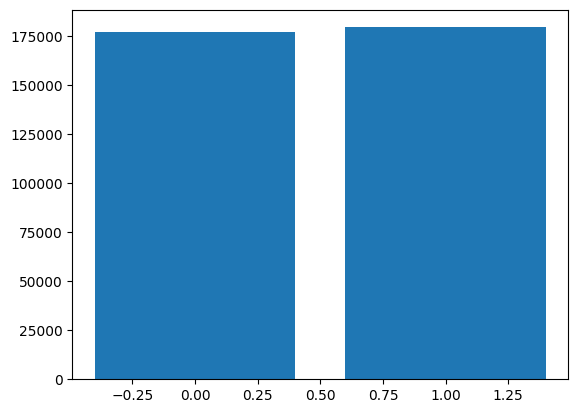

In [167]:
real_vs_ai_count_comparison(refined_dataset)

In [168]:
compare_original_and_refined(dataset, refined_dataset)

Original dataset size: 487235
Refined dataset size: 356611
Number of rows removed: 130624


## Making the dataset size 5000

In [169]:
# DIVIDING INTO REAL AND AI GENERATED
ai_generated = refined_dataset[refined_dataset['generated'] == 1]
real = refined_dataset[refined_dataset['generated'] == 0]

# SHUFFLING THE TWO
ai_generated = ai_generated.sample(frac=1, random_state=42).reset_index(drop=True)
real = real.sample(frac=1, random_state=42).reset_index(drop=True)

# ONLY KEEPING 2500 ROWS OF EACH
ai_generated = ai_generated.iloc[:2500, :]
real = real.iloc[:2500, :]

# COMBINING AND SHUFFLING AGAIN
refined_dataset = pd.concat([ai_generated, real], ignore_index=True)
refined_dataset = refined_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Final Dataset Statistics

In [170]:
compare_original_and_refined(dataset, refined_dataset)

Original dataset size: 487235
Refined dataset size: 5000
Number of rows removed: 482235


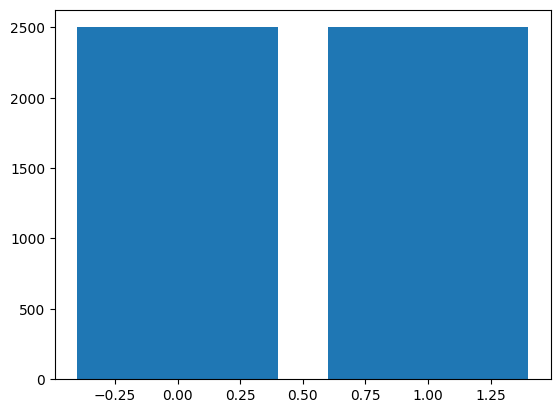

In [171]:
real_vs_ai_count_comparison(refined_dataset)

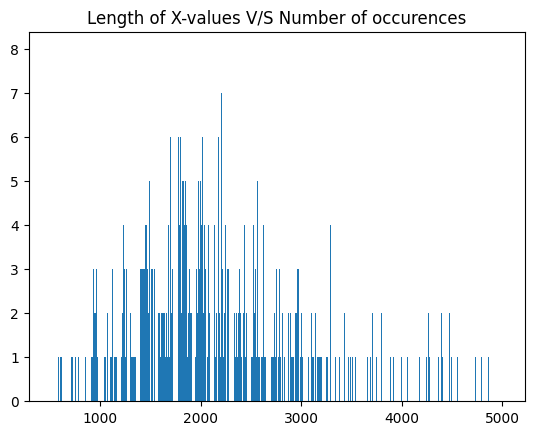

In [172]:
plot_text_length(refined_dataset)

# Export Refined Dataset

In [173]:
refined_dataset.to_csv("/content/drive/MyDrive/AI_Human_Refined.csv")